### Importing data and the functions

In [1]:
## importing the functions
import pandas as pd
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as ss; ss.set()

from python_files.cell import CellNode
from python_files.cell_utils import generateLineageWithTime, separate_pop, inG1_or_G2

## Reading the data
df = pd.read_excel(r'../data/single_cellData.xlsx')
##----------------------- Preprocessing the data ------------------------##

# dataFrmae into numpy array
a = df.values

G1 = a[:, 0] # G1 for control
G2 = a[:, 1] # G2 for control

G1_lap = a[:, 3] # G1 for lapatinib
G2_lap = a[:, 4] # G2 for lapatinib



# removing nan from the array
G2 = G2[~np.isnan(G2)]
G1 = G1[~np.isnan(G1)]

G2_lap = G2_lap[~np.isnan(G2_lap)]
G1_lap = G1_lap[~np.isnan(G1_lap)]

# converting from unit of [frames] into [hours]
# every frame is every 30 minutes, so dividing the numbers by 2 gives unit of [hours]
G1 = G1/2
G2 = G2/2
G1_lap = G1_lap/2
G2_lap = G2_lap/2

### Histogram of control vs. lapatinib

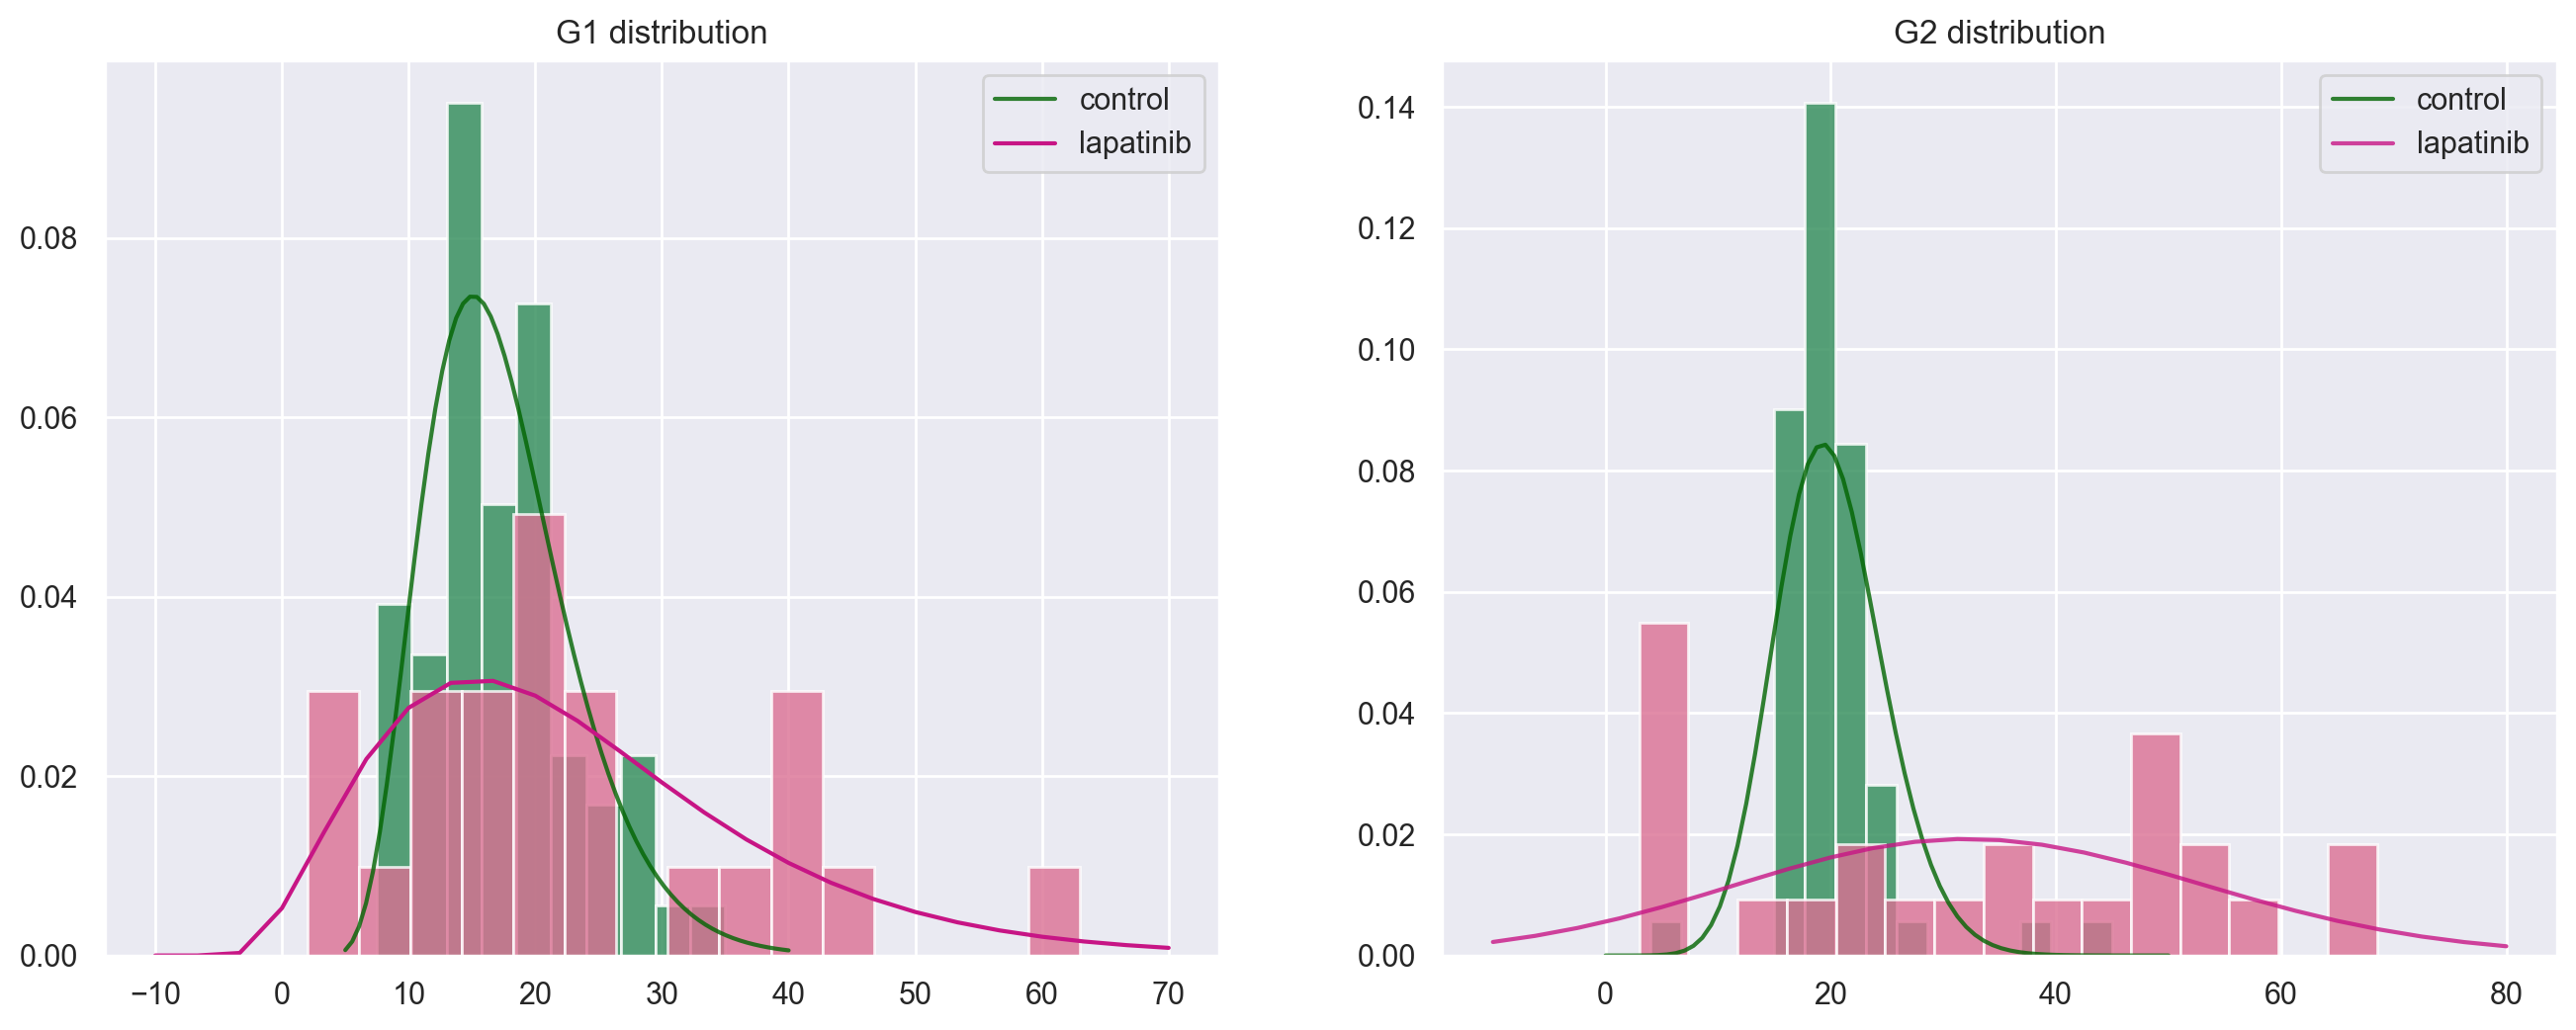

In [3]:
plt.figure(figsize = (16, 6), dpi = 200)

# G1
plt.subplot(1,2,1)
plt.hist(G1, density=True, bins = 10, alpha = 0.8, color = 'sienna')

xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(G1))

ag,bg,cg = sp.gamma.fit(G1)  
pdf_gamma = sp.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="control", alpha = 0.8, color = 'olive')


plt.hist(G1_lap, density=True, bins = 15, alpha = 0.8, color = 'palevioletred')

xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(G1_lap))

ag,bg,cg = sp.gamma.fit(G1_lap)  
pdf_gamma = sp.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="lapatinib", color = "mediumvioletred")
# plt.axvline(x = 15.0, linestyle="--", alpha = 0.7, color = 'k')
plt.title("G1 distribution")
plt.legend()
# G2
plt.subplot(1,2,2)
plt.hist(G2, density=True, bins = 15, alpha = 0.8, color = 'sienna')

xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(G2))

ag,bg,cg = sp.gamma.fit(G2)  
pdf_gamma = sp.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="control", alpha = 0.8, color = 'olive')


plt.hist(G2_lap, density=True, bins = 15, alpha = 0.8, color = 'palevioletred')

xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(G2_lap))

ag,bg,cg = sp.gamma.fit(G2_lap)
pdf_gamma = sp.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="lapatinib", alpha = 0.8, color = "mediumvioletred")
plt.title("G2 distribution")
plt.legend()
plt.savefig("dists.png")
plt.show()

### C) Histogram of G1 times with Gamma fit

### D) Histogram of G2 times with Gamma fit

### E) Histogram of control vs. drug to show delay 